In [5]:
source("../src/plot_over_months_by_station.R")
source("../src/plot_station_avg_by_month.R")
source("../src/plot_boxplot_by_season.R")

In [8]:
data <- read.csv("../csv/observations.csv", header = TRUE, sep = ",")
print(dim(data))  # Print the dimensions of the data frame

[1] 1719567      62


In [9]:
stations <-read.csv("../csv/stations.csv", header = TRUE, sep = ",")
print(dim(stations))  # Print the dimensions of the data frame

[1] 62 12


In [18]:
summary(data)


 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barom√©trique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000               
 NA's   :40694                     NA's   :68236                
 Direct

üìç S√©lection des stations:

Nord : 7015 ‚Äì Fretin (59, Hauts-de-France)

Centre (√éle-de-France) : 7149 ‚Äì Athis-Mons (91, Essonne)

Ouest : 7110 ‚Äì Guipavas (29, Finist√®re)

Est : 7190 ‚Äì Holtzheim (67, Bas-Rhin)

Sud-Est : 7650 ‚Äì Marignane (13, Bouches-du-Rh√¥ne)

Sud-Ouest (Occitanie) : 7630 ‚Äì Blagnac (31, Haute-Garonne)

Warning message:
‚ÄúRemoved 114 rows containing non-finite outside the scale range
(`stat_boxplot()`).‚Äù
Warning message:
‚ÄúRemoved 133 rows containing non-finite outside the scale range
(`stat_boxplot()`).‚Äù
Warning message:
‚ÄúRemoved 135 rows containing non-finite outside the scale range
(`stat_boxplot()`).‚Äù
Warning message:
‚ÄúRemoved 4207 rows containing non-finite outside the scale range
(`stat_boxplot()`).‚Äù
Warning message:
‚ÄúRemoved 121 rows containing non-finite outside the scale range
(`stat_boxplot()`).‚Äù
Warning message:
‚ÄúRemoved 72772 rows containing non-finite outside the scale range
(`stat_boxplot()`).‚Äù


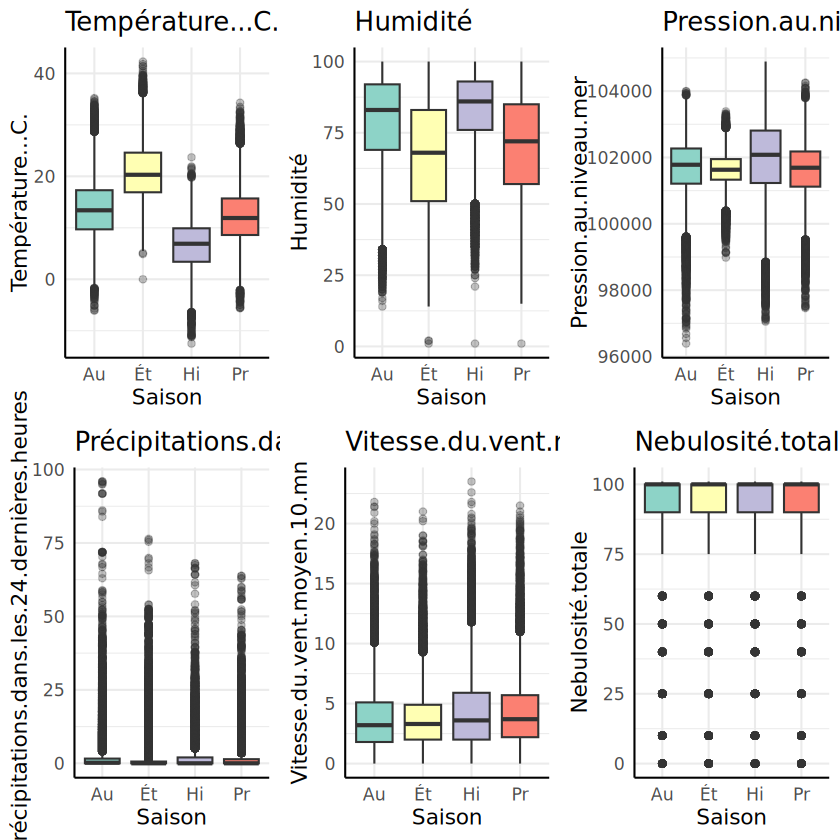

In [48]:
# library(gridExtra)

# stations_a_comparer <- c(7015, 7149, 7110, 7190, 7650, 7630)

# # Variables m√©t√©o s√©lectionn√©es
# vars <- c("Temp√©rature...C.", 
#           "Humidit√©", 
#           "Pression.au.niveau.mer", 
#           "Pr√©cipitations.dans.les.24.derni√®res.heures", 
#           "Vitesse.du.vent.moyen.10.mn", 
#           "Nebulosit√©.totale")

# G√©n√©rer une liste de plots
plots <- lapply(vars, function(v) {
  plot_boxplot_by_season(data, 
                             stations = stations_a_comparer, 
                             variable = v)
})

# Afficher en grille 3x2
grid.arrange(grobs = plots, ncol = 3, nrow = 2)


In [11]:
# Codes Insee des r√©gions m√©tropolitaines (hors DROM-COM)
codes_metropole <- c(11, 24, 27, 28, 32, 44, 52, 53, 75, 76, 84, 94) 


stations_metropole <- stations %>% 
  filter(region..code. %in% codes_metropole)

# R√©cup√©rer la liste des ID de stations m√©tropolitaines
id_metropole <- stations_metropole$ID.OMM.station

# ---- 2. Charger la base observations m√©t√©o ----
# exemple : data <- read.csv("observations.csv")

# Filtrer uniquement les observations de France m√©tropolitaine
data_metropole <- data %>% 
  filter(ID.OMM.station %in% id_metropole)

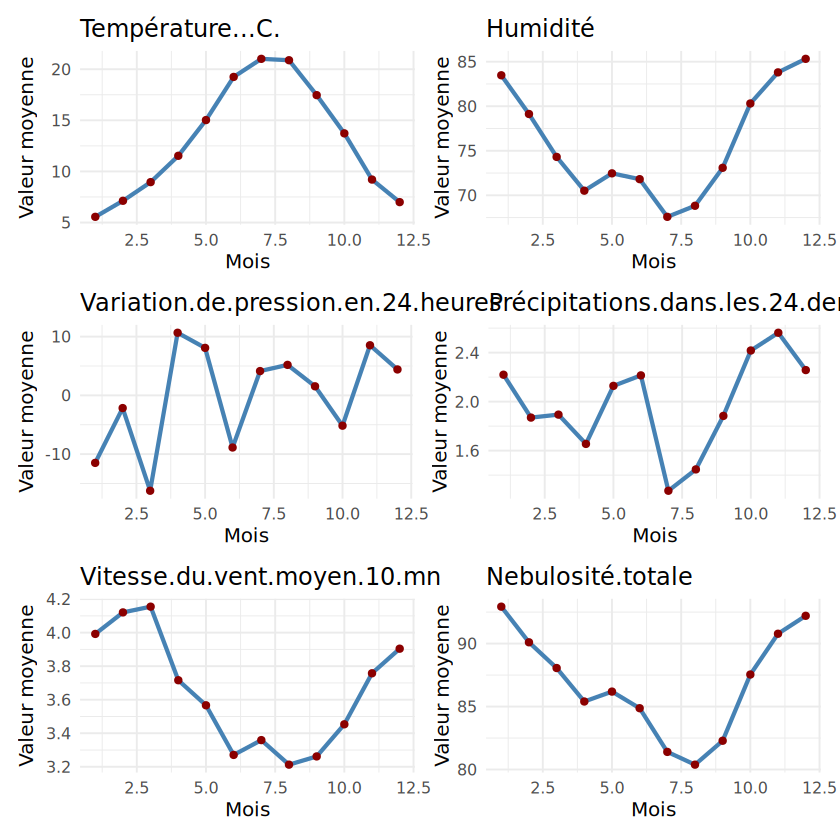

In [ ]:
library(dplyr)
library(ggplot2)
library(patchwork)

library(dplyr)

# ---- 1. Charger la base des m√©tadonn√©es stations (communes/r√©gions) ----
# exemple : stations <- read.csv("stations.csv")



# Variables s√©lectionn√©es
vars <- c("Temp√©rature...C.", 
          "Humidit√©", 
          "Variation.de.pression.en.24.heures", 
          "Pr√©cipitations.dans.les.24.derni√®res.heures", 
          "Vitesse.du.vent.moyen.10.mn", 
          "Nebulosit√©.totale")

# G√©n√©rer les graphiques
plots <- lapply(vars, function(v) {
  data_metropole %>%
    group_by(mois_de_l_annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = mois_de_l_annee, y = val_moy)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste(v),
         x = "Mois",
         y = "Valeur moyenne")
})

# ‚ö° Organiser en grille 3 x 2
(plots[[1]] | plots[[2]]) / 
(plots[[3]] | plots[[4]]) / 
(plots[[5]] | plots[[6]])


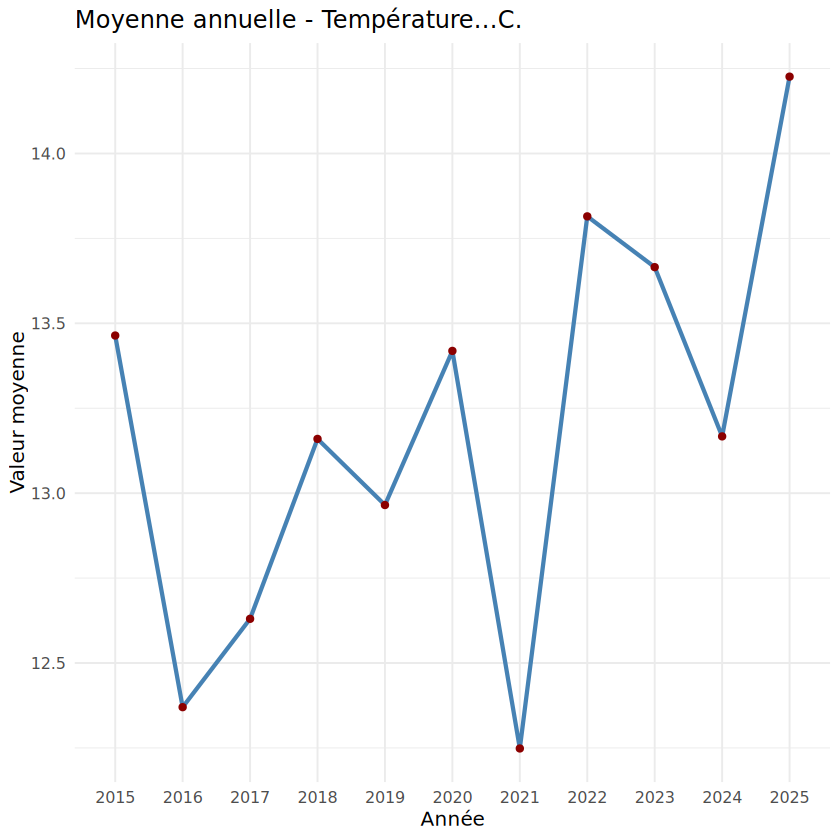

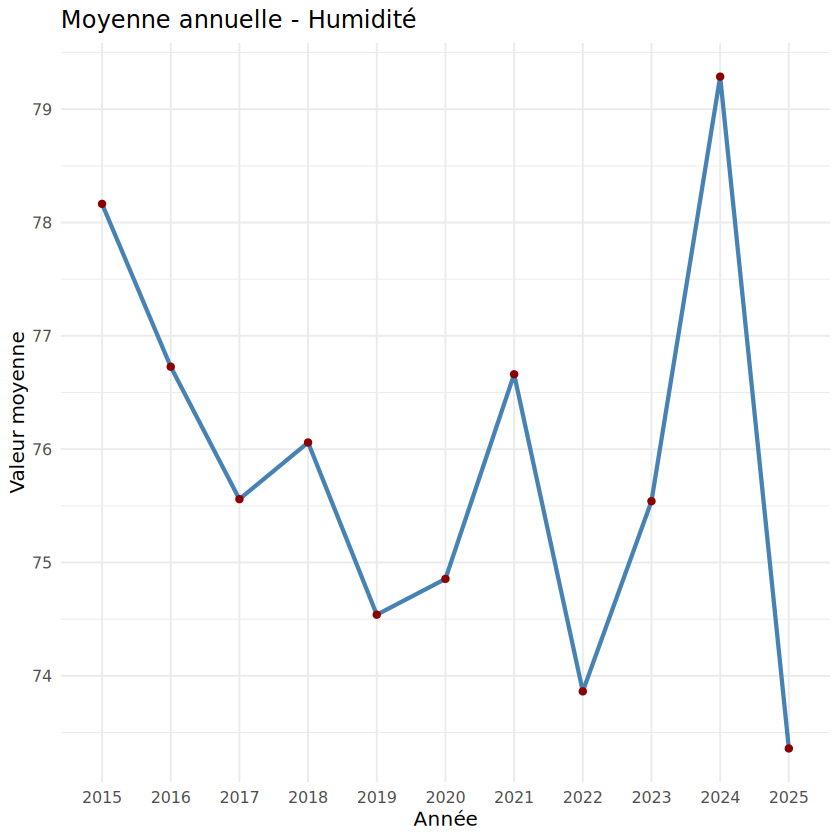

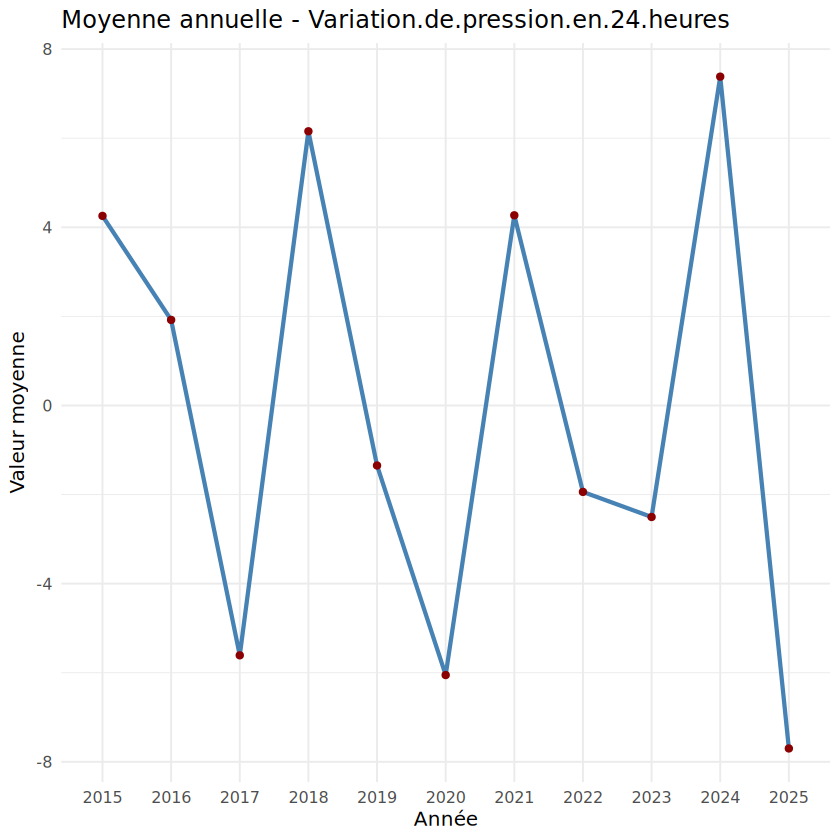

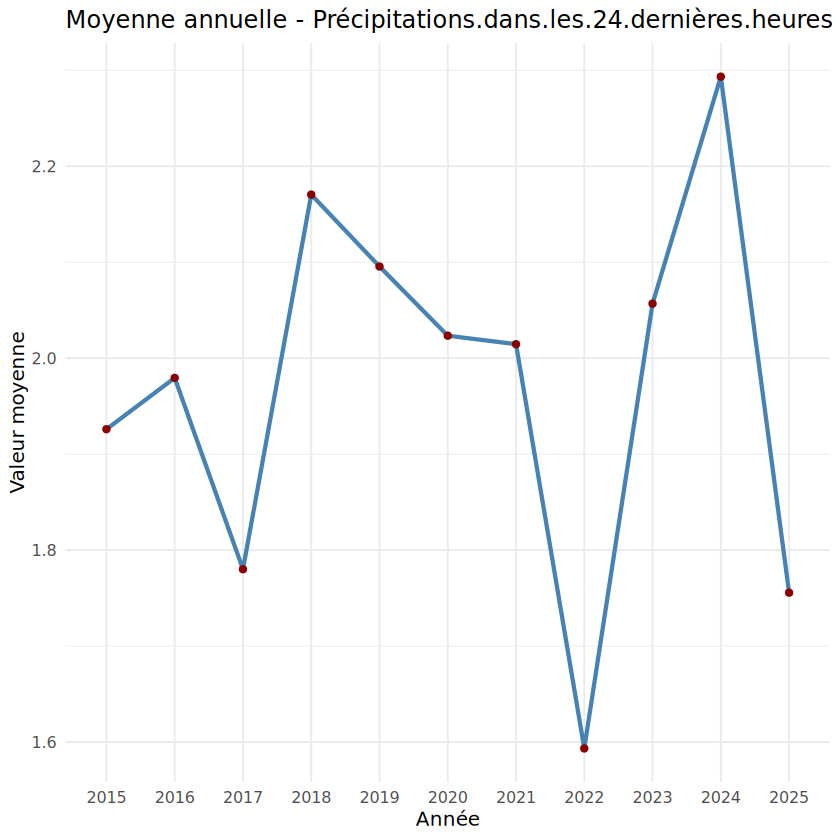

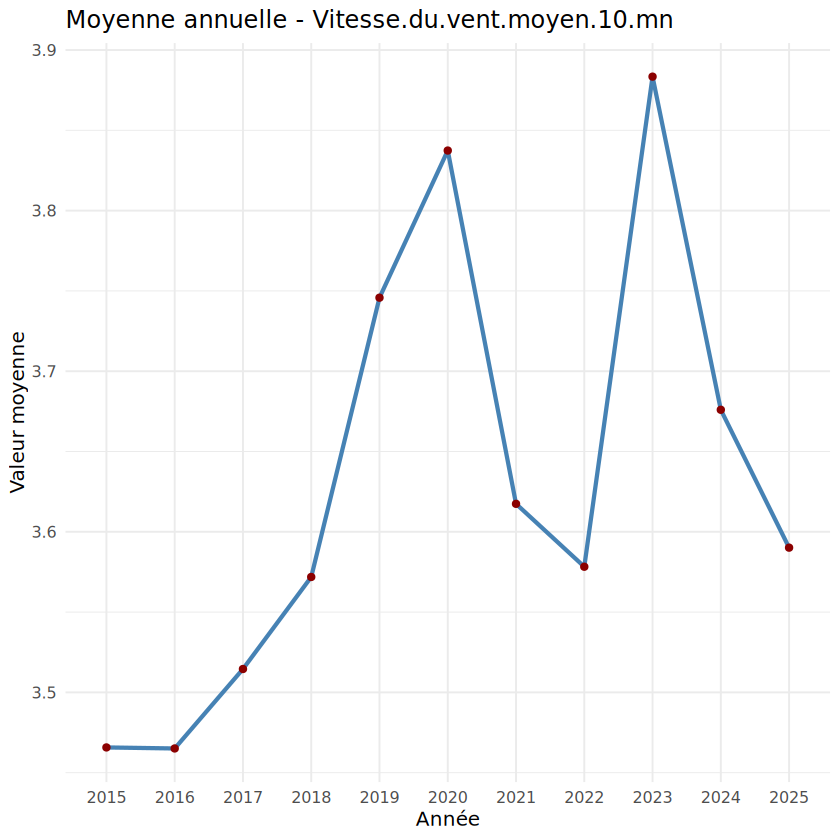

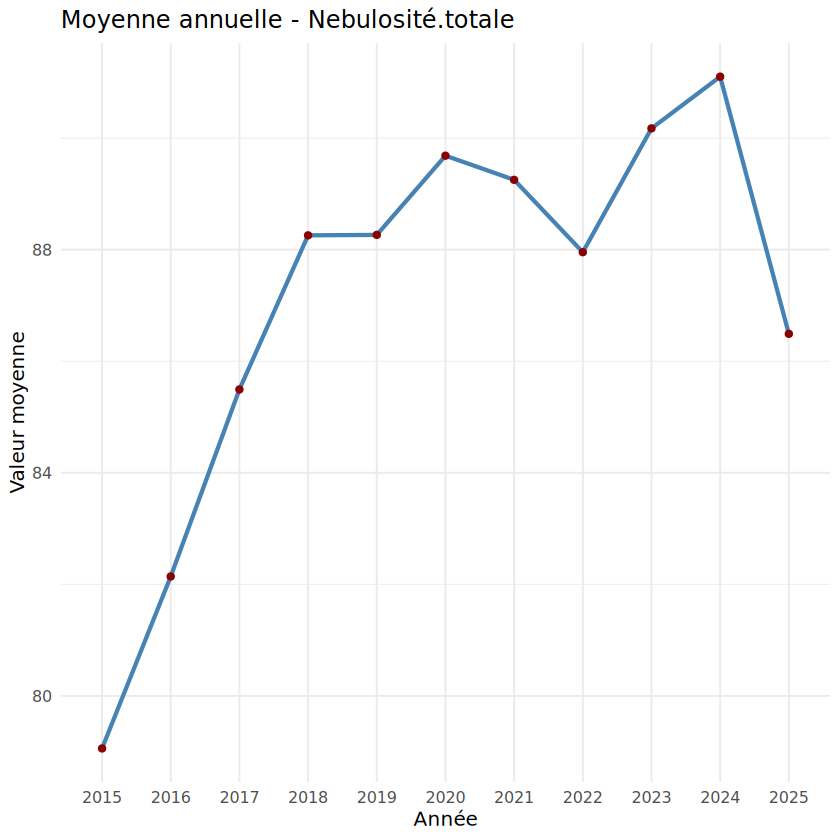

In [13]:
library(dplyr)
library(ggplot2)
library(patchwork)
# La colonne Date est de type caract√®re (ex: "2018-04-04T05:00:00+02:00")
data_metropole <- data_metropole %>%
  mutate(annee = format(as.Date(substr(Date, 1, 10)), "%Y"))

# ---- G√©n√©rer graphiques : moyennes par ann√©e ----
plots <- lapply(vars, function(v) {
  data_metropole %>%
    group_by(annee) %>%
    summarise(val_moy = mean(.data[[v]], na.rm = TRUE)) %>%
    ggplot(aes(x = annee, y = val_moy, group = 1)) +
    geom_line(color = "steelblue", size = 1.2) +
    geom_point(color = "darkred") +
    theme_minimal(base_size = 12) +
    labs(title = paste("Moyenne annuelle -", v),
         x = "Ann√©e",
         y = "Valeur moyenne")
})

# ---- Organiser en grille 3 x 2 ----
(plots[[1]]) 
(plots[[2]])  
(plots[[3]]) 
(plots[[4]])  
(plots[[5]])
(plots[[6]])




## Regression
### R√©gression simple :Temp√©rature ~ Humidit√©


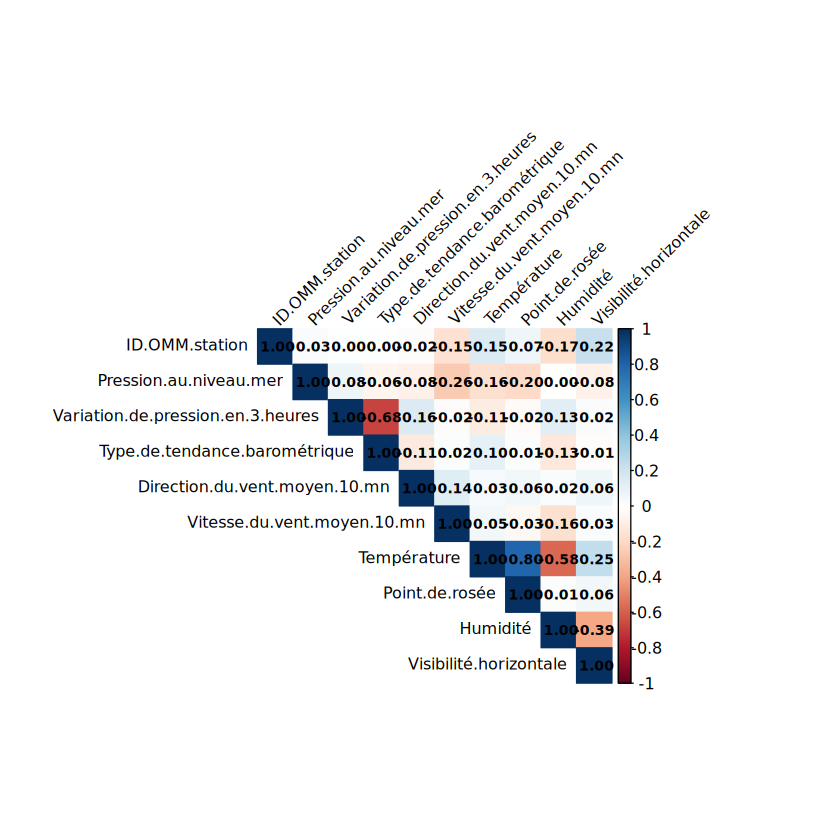

In [31]:
library(corrplot)
library(dplyr)
par(bg='white')
# S√©lectionner uniquement les colonnes num√©riques
vars_num <- data_metropole %>% 
  select(where(is.numeric))

# Garder seulement les 10 premi√®res colonnes num√©riques (optionnel)
vars_num <- vars_num[, 1:10]

# Corr√©lation
mat_cor <- cor(vars_num, use = "pairwise.complete.obs")

# Sauvegarde dans une grande image
# png("../fig/corrplot2.png", width = 1200, height = 1200, res = 150)

corrplot(mat_cor, method = "color", type = "upper",
         tl.col = "black", tl.srt = 45, 
         tl.cex = 0.8,         # taille du texte des labels
         addCoef.col = "black", 
         number.cex = 0.7)

# dev.off()


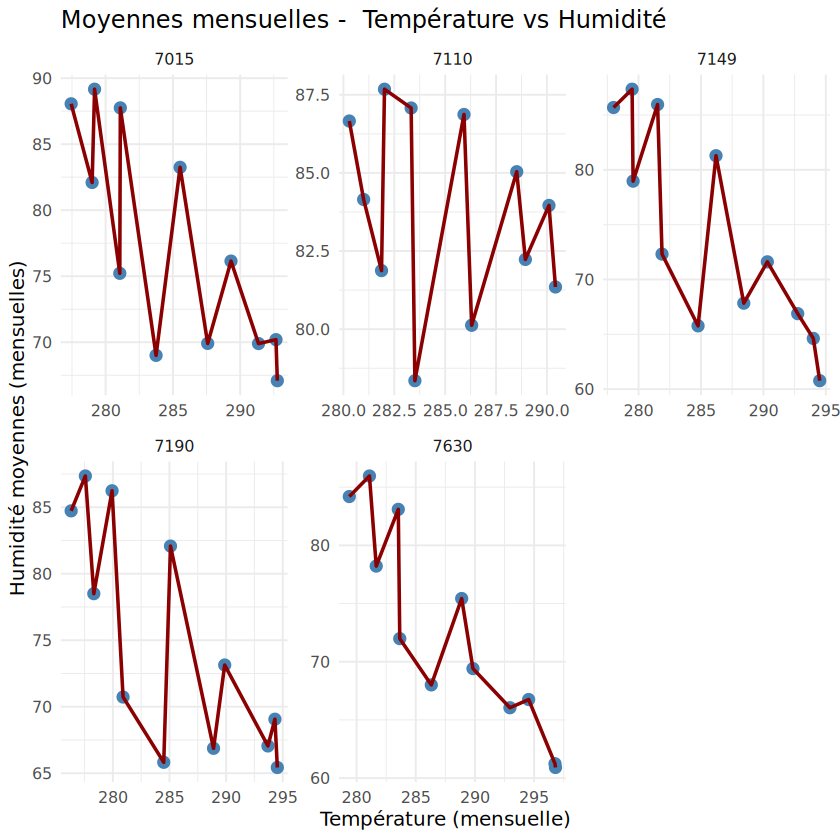

In [32]:
par(bg='white')


library(dplyr)
library(ggplot2)

stations_a_comparer <- c(7015, 7149, 7110, 7190,7630)

# Calculer la moyenne mensuelle par station
data_monthly <- data_metropole %>%
  filter(ID.OMM.station %in% stations_a_comparer) %>%
  group_by(ID.OMM.station, mois_de_l_annee) %>%
  summarise(
    Temp√©rature_moy = mean(Temp√©rature, na.rm = TRUE),
    Humidit√©_moy = mean(Humidit√©, na.rm = TRUE),
    .groups = "drop"
  )


# Plot : Visibilit√© vs Pr√©cipitations, facett√© par station
ggplot(data_monthly, aes(x = Temp√©rature_moy, y = Humidit√©_moy)) +
  geom_point(color = "steelblue", size = 3) +
  geom_line(color = "darkred", size = 1) +
  theme_minimal(base_size = 12) +
  labs(title = "Moyennes mensuelles -  Temp√©rature vs Humidit√©",
       x = "Temp√©rature (mensuelle)",
       y = "Humidit√© moyennes (mensuelles)") +
  facet_wrap(~ ID.OMM.station, scales = "free")



`geom_smooth()` using formula = 'y ~ x'


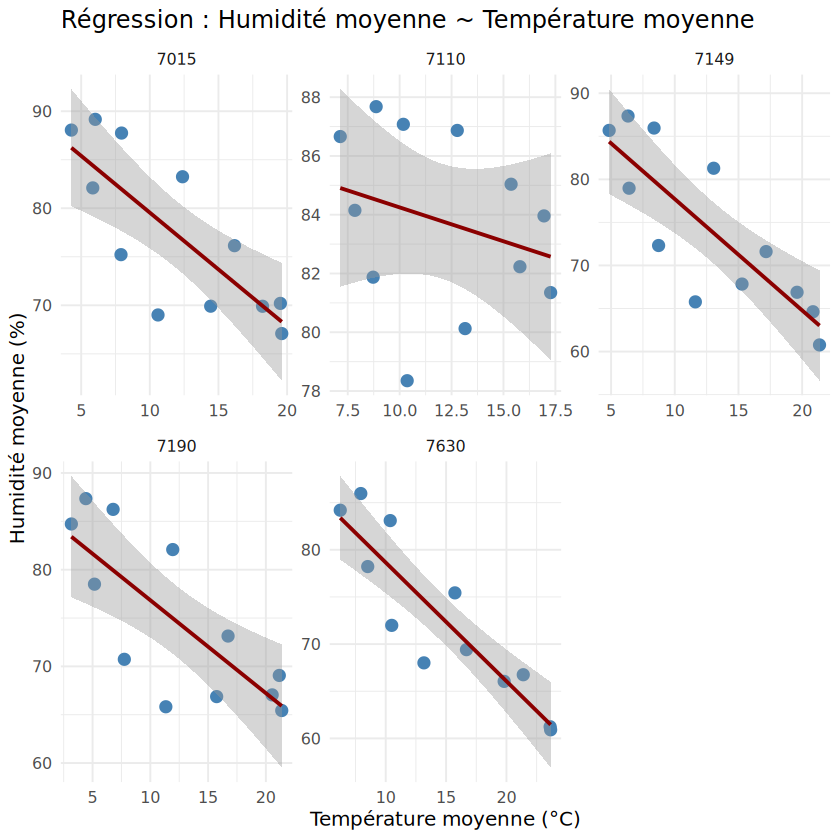

In [33]:
library(dplyr)
library(ggplot2)

stations_a_comparer <- c(7015, 7149, 7110, 7190, 7650, 7630)

# 1. Calculer les moyennes mensuelles de Temp√©rature et Humidit√© par station
data_monthly <- data_metropole %>%
  filter(ID.OMM.station %in% stations_a_comparer) %>%
  group_by(ID.OMM.station, mois_de_l_annee) %>%
  summarise(
    Temp_moy = mean(Temp√©rature...C., na.rm = TRUE),
    Humid_moy = mean(Humidit√©, na.rm = TRUE),
    .groups = "drop"
  )

# 2. Plot avec r√©gression lin√©aire par station
ggplot(data_monthly, aes(x = Temp_moy, y = Humid_moy)) +
  geom_point(color = "steelblue", size = 3) +
  geom_smooth(method = "lm", se = TRUE, color = "darkred") +
  theme_minimal(base_size = 12) +
  labs(title = "R√©gression : Humidit√© moyenne ~ Temp√©rature moyenne",
       x = "Temp√©rature moyenne (¬∞C)",
       y = "Humidit√© moyenne (%)") +
  facet_wrap(~ ID.OMM.station, scales = "free")


On trouve bien une relation lin√©raire entre la moyenne de la temp√©rature par mois et la moyenne de  l'humidit√© par mois pour la plupart des stations test√©es 

### R√©gression multiple:Visibilit√©_moy ~ Humidit√© + Temp√©rature +Pression au niveau de la mer + Pr√©cipitations au 24h

In [27]:
# ---- Pr√©paration des donn√©es ----

# 1. Ajouter ann√©e et saison
data_metropole <- data_metropole %>%
  mutate(
    annee = format(as.Date(substr(Date, 1, 10)), "%Y"),
    saison = case_when(
      mois_de_l_annee %in% c(12, 1, 2)  ~ "Hiver",
      mois_de_l_annee %in% c(3, 4, 5)   ~ "Printemps",
      mois_de_l_annee %in% c(6, 7, 8)   ~ "√ât√©",
      mois_de_l_annee %in% c(9, 10, 11) ~ "Automne"
    )
  )

# 2. Moyennes saisonni√®res par station et ann√©e
data_yearly <- data_metropole %>%
  group_by(`ID.OMM.station`, annee, saison) %>%
  summarise(
    Visib_moy   = mean(`Visibilit√©.horizontale`, na.rm = TRUE),
    Humid_moy   = mean(`Humidit√©`, na.rm = TRUE),
    Temp_moy    = mean(`Temp√©rature`, na.rm = TRUE),
    Pression    = mean(`Pression.au.niveau.mer`, na.rm = TRUE),
    Precip_24h  = mean(`Pr√©cipitations.dans.les.24.derni√®res.heures`, na.rm = TRUE),
    .groups = "drop"
  )

# 3. Centrer et r√©duire les pr√©dicteurs
data_yearly <- data_yearly %>%
  mutate(
    Humid_scaled    = scale(Humid_moy, center = TRUE, scale = TRUE)[,1],
    Temp_scaled     = scale(Temp_moy, center = TRUE, scale = TRUE)[,1],
    Pression_scaled = scale(Pression, center = TRUE, scale = TRUE)[,1],
    Precip_scaled   = scale(Precip_24h, center = TRUE, scale = TRUE)[,1]
  )


# A tibble: 20 √ó 6
   term            estimate std.error statistic   p.value Saison   
   <chr>              <dbl>     <dbl>     <dbl>     <dbl> <chr>    
 1 (Intercept)       27638.     1127.    24.5   7.79e- 82 Hiver    
 2 Humid_scaled      -6951.      580.   -12.0   1.82e- 28 Hiver    
 3 Temp_scaled         336.      914.     0.368 7.13e-  1 Hiver    
 4 Pression_scaled    -112.      371.    -0.302 7.63e-  1 Hiver    
 5 Precip_scaled      -216.      460.    -0.471 6.38e-  1 Hiver    
 6 (Intercept)       25130.      740.    34.0   6.58e-115 Printemps
 7 Humid_scaled      -4892.      641.    -7.63  2.13e- 13 Printemps
 8 Temp_scaled        7603.     1411.     5.39  1.27e-  7 Printemps
 9 Pression_scaled   -1083.      545.    -1.99  4.76e-  2 Printemps
10 Precip_scaled      1938.      636.     3.04  2.50e-  3 Printemps
11 (Intercept)       15684.     1730.     9.07  5.52e- 18 √ât√©      
12 Humid_scaled      -2289.      663.    -3.45  6.13e-  4 √ât√©      
13 Temp_scaled        80

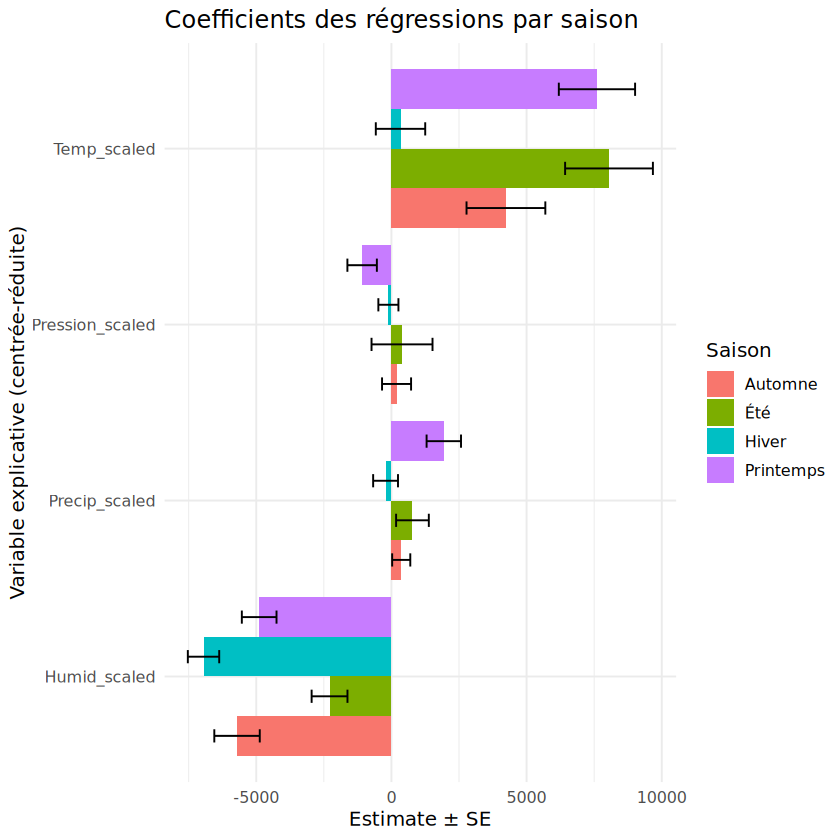

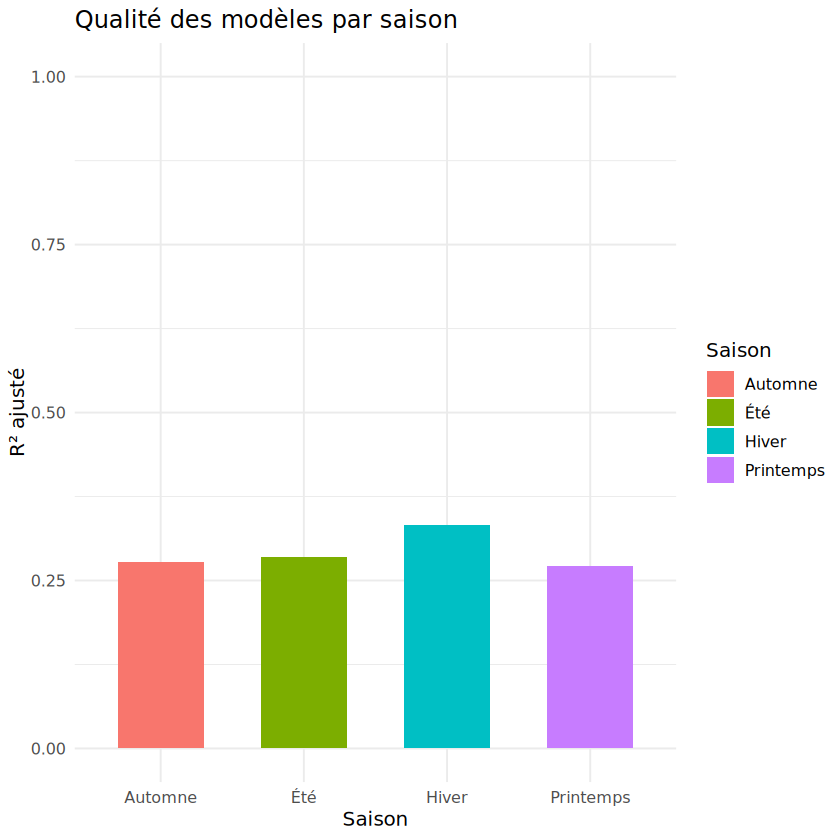

In [28]:
library(dplyr)
library(broom)   # pour tidy() et glance()

# 1. Fonction qui ajuste et retourne les r√©sultats
fit_model <- function(saison_name) {
  d <- filter(data_yearly, saison == saison_name)
  modele <- lm(Visib_moy ~ Humid_scaled + Temp_scaled + Pression_scaled + Precip_scaled,
               data = d)
  tidy_res   <- broom::tidy(modele) %>% mutate(Saison = saison_name)
  glance_res <- broom::glance(modele) %>% mutate(Saison = saison_name)
  list(tidy = tidy_res, glance = glance_res)
}

# 2. Ajuster les 4 mod√®les
res_hiver     <- fit_model("Hiver")
res_printemps <- fit_model("Printemps")
res_ete       <- fit_model("√ât√©")
res_automne   <- fit_model("Automne")

# 3. Rassembler les coefficients
coef_all <- bind_rows(res_hiver$tidy, res_printemps$tidy, 
                      res_ete$tidy, res_automne$tidy)

# 4. Rassembler les m√©triques globales (R¬≤, AIC, etc.)
stats_all <- bind_rows(res_hiver$glance, res_printemps$glance,
                       res_ete$glance, res_automne$glance)

# üëâ Afficher
print(coef_all)   # d√©tails des coefficients par saison
print(stats_all)  # qualit√© globale par saison
library(ggplot2)

# ---- 1. Plot des coefficients par saison ----
ggplot(coef_all %>% filter(term != "(Intercept)"),
       aes(x = term, y = estimate, fill = Saison)) +
  geom_col(position = "dodge") +
  geom_errorbar(aes(ymin = estimate - std.error,
                    ymax = estimate + std.error),
                position = position_dodge(width = 0.9), width = 0.3) +
  theme_minimal(base_size = 12) +
  labs(title = "Coefficients des r√©gressions par saison",
       x = "Variable explicative (centr√©e-r√©duite)",
       y = "Estimate ¬± SE") +
  coord_flip()

# ---- 2. Plot des R¬≤ ajust√©s par saison ----
ggplot(stats_all, aes(x = Saison, y = adj.r.squared, fill = Saison)) +
  geom_col(width = 0.6) +
  theme_minimal(base_size = 12) +
  labs(title = "Qualit√© des mod√®les par saison",
       x = "Saison",
       y = "R¬≤ ajust√©") +
  ylim(0, 1)


Warning message:
‚ÄúRemoved 12 rows containing missing values or values outside the scale range
(`geom_point()`).‚Äù
Warning message:
‚ÄúRemoved 11 rows containing missing values or values outside the scale range
(`geom_point()`).‚Äù
Warning message:
‚ÄúRemoved 12 rows containing missing values or values outside the scale range
(`geom_point()`).‚Äù
Warning message:
‚ÄúRemoved 12 rows containing missing values or values outside the scale range
(`geom_point()`).‚Äù


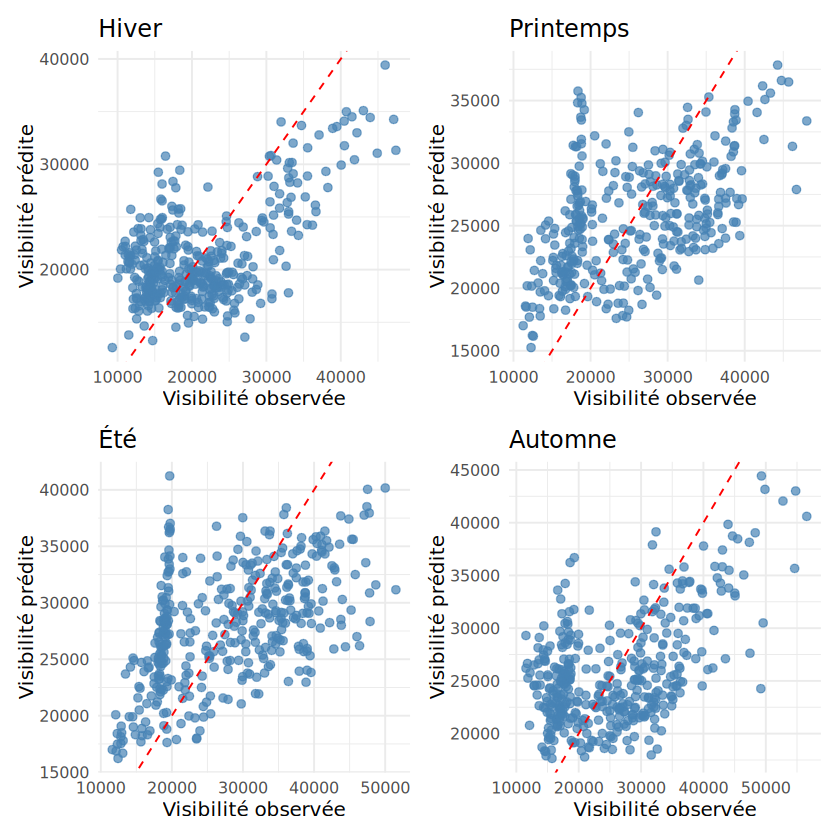

In [30]:
# ---- Fonction pour ajuster un mod√®le et cr√©er un plot ----
fit_plot <- function(saison_name) {
  d <- filter(data_yearly, saison == saison_name)
  
  # Ajuster la r√©gression
  modele <- lm(Visib_moy ~ Humid_scaled + Temp_scaled + Pression_scaled + Precip_scaled,
               data = d)
  
  # Ajouter les pr√©dictions
  d$Pred <- predict(modele, newdata = d)
  
  # Scatter plot Observ√© vs Pr√©dit
  ggplot(d, aes(x = Visib_moy, y = Pred)) +
    geom_point(color = "steelblue", size = 2, alpha = 0.7) +
    geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +
    theme_minimal(base_size = 12) +
    labs(
      title = saison_name,
      x = "Visibilit√© observ√©e",
      y = "Visibilit√© pr√©dite"
    )
}

# ---- G√©n√©rer les 4 plots ----
plot_hiver     <- fit_plot("Hiver")
plot_printemps <- fit_plot("Printemps")
plot_ete       <- fit_plot("√ât√©")
plot_automne   <- fit_plot("Automne")

# ---- Afficher en grille 2x2 ----
(plot_hiver | plot_printemps) / (plot_ete | plot_automne)
